# 

In [5]:
# to make matplotlib figures nice
import matplotlib
%matplotlib inline
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

Import vigra and graph submodule, and import numpy from vigra

In [10]:
import vigra
from vigra import graphs
import numpy
import pylab

Read in an image

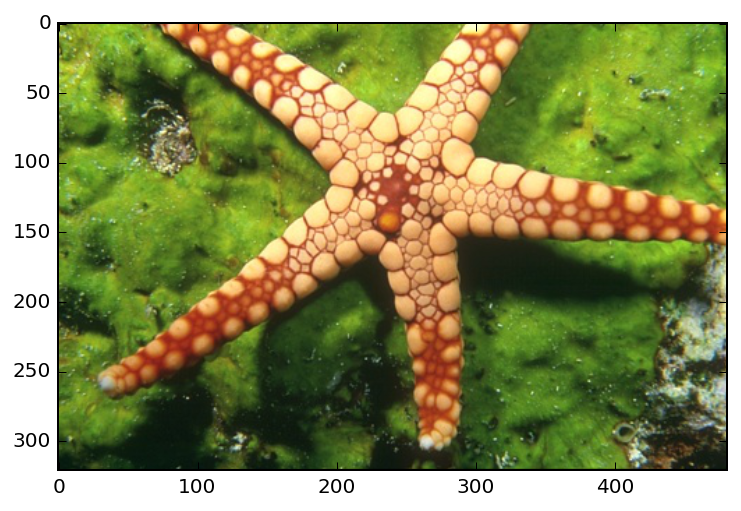

In [7]:
# load image and convert to LAB
filepath = '12003.jpg'
img = vigra.impex.readImage(filepath)
imgLab = vigra.colors.transform_RGB2Lab(img)
vigra.imshow(img,show=False)
vigra.show()

Compute gradient magnitude on image which shape*2-1

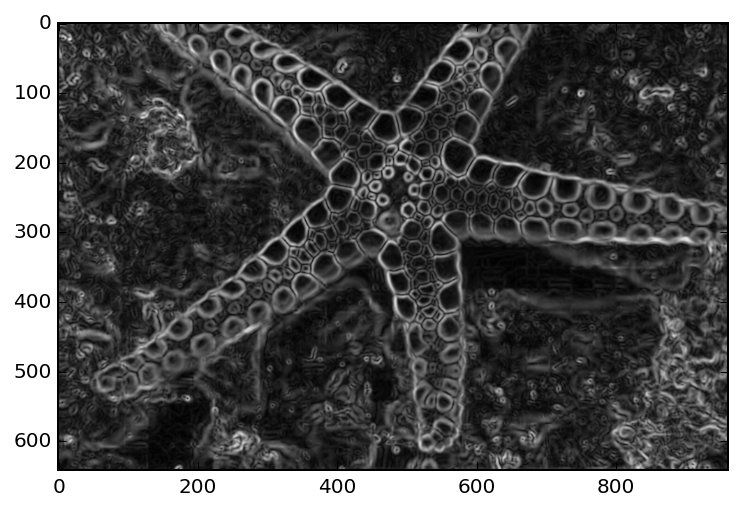

In [8]:
# compute gradient on interpolated image
sigmaGradMag = 2.0 
imgLabBig = vigra.resize(imgLab, [imgLab.shape[0]*2-1, imgLab.shape[1]*2-1])
gradMag = vigra.filters.gaussianGradientMagnitude(imgLabBig, sigmaGradMag)
vigra.imshow(gradMag,show=False)
vigra.show()

Get oversegmentation

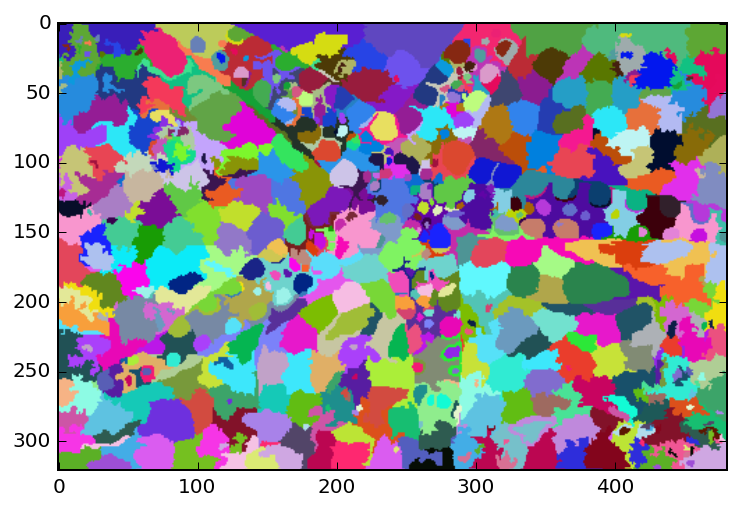

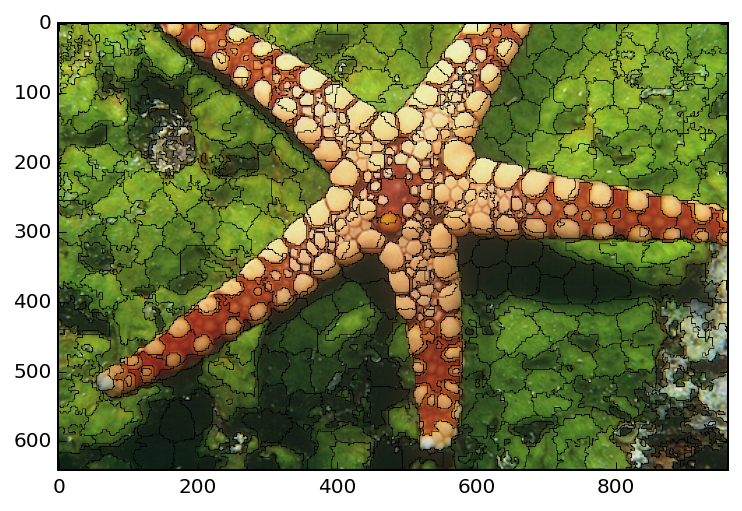

In [11]:
# get super-pixels with slic on LAB image
superpixelDiameter = 20 # super-pixel size
slicWeight = 10.0       # SLIC color - spatial weight
imgLab = vigra.colors.transform_RGB2Lab(img)
labels, nseg = vigra.analysis.slicSuperpixels(imgLab, slicWeight,
                                              superpixelDiameter)
labels = vigra.analysis.labelImage(labels)
# A random colormap for matplotlib
cmap = matplotlib.colors.ListedColormap ( numpy.random.rand ( 256,3))
pylab.imshow ( labels.squeeze().swapaxes(0,1), cmap = cmap)
pylab.show()

vigra.segShow(img,labels,alpha=0.0)
vigra.show()


Get a 2d grid graph

In [12]:
gridGraph = graphs.gridGraph(img.shape[0:2])
print(gridGraph)

Nodes: 154401 Edges: 308000 maxNodeId: 154400 maxEdgeId: 308801


Compute a region adjacency graph from oversegmentation labeling and grid graph

In [13]:
# get region adjacency graph from super-pixel labels
rag = graphs.regionAdjacencyGraph(gridGraph, labels)
print(rag)

Nodes: 764 Edges: 1963 maxNodeId: 764 maxEdgeId: 1962


Get edge weight for grid graph

In [14]:
gridGraphEdgeIndicator = graphs.edgeFeaturesFromInterpolatedImage(gridGraph,
                                                                  gradMag)

print(gridGraphEdgeIndicator.shape)

(481, 321, 2)


Get edge weight and node features accumulated from grid graph edge weights and node features

In [16]:
# accumulate edge weights grid graph edge weights
edgeWeights = rag.accumulateEdgeFeatures(gridGraphEdgeIndicator)

# accumulate node features from grid graph node map
# which is just a plain image (with channels)
nodeFeatures = rag.accumulateNodeFeatures(imgLab)

print(edgeWeights.shape)
print(nodeFeatures.shape)

(1963,)
(765, 3)


prepare 
get edge length
get node size
nodeLabels  (765,) uint32


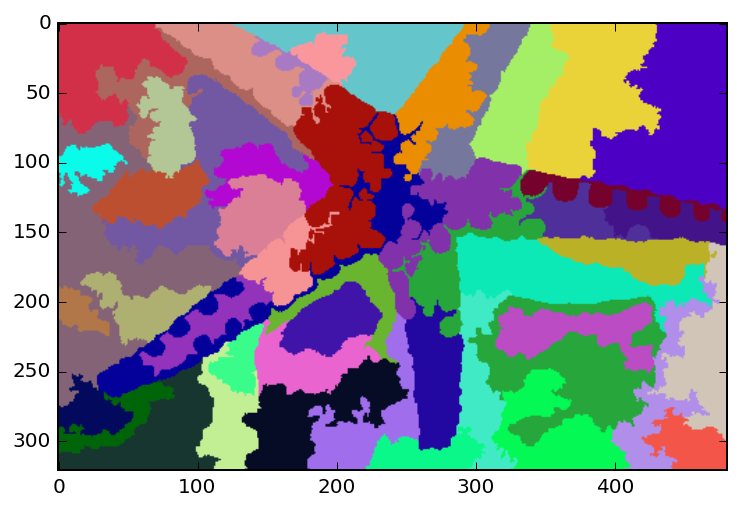

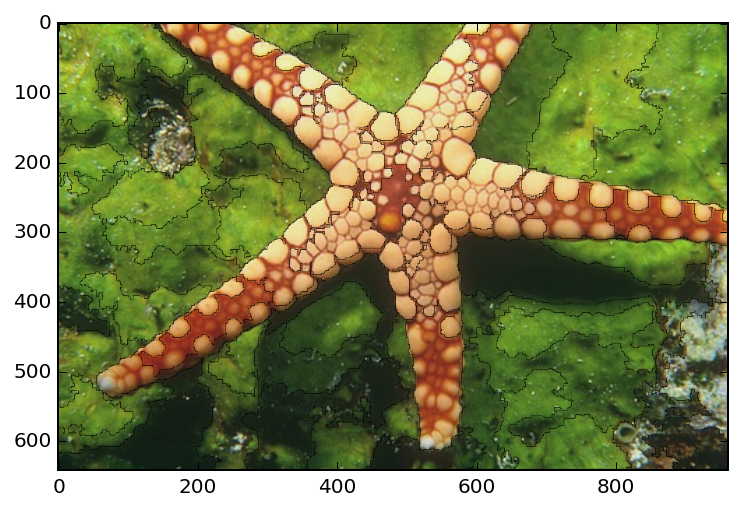

In [17]:
# do agglomerativeClustering
beta = 0.5              # node vs edge weight
nodeNumStop = 50        # desired num. nodes in result
labels = graphs.agglomerativeClustering(graph=rag, edgeWeights=edgeWeights,
                                        beta=beta, nodeFeatures=nodeFeatures,
                                        nodeNumStop=nodeNumStop)
# show result 
imgLabels =rag.projectLabelsToBaseGraph(labels)
cmap = matplotlib.colors.ListedColormap ( numpy.random.rand ( 256,3))
pylab.imshow ( imgLabels.squeeze().swapaxes(0,1), cmap = cmap)
pylab.show()

rag.show(img,labels)
vigra.show()
